![Futuristic electric car charging](ev_charging.png)

In [23]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading Data
private = pd.read_csv('private_ev_charging.csv')
public = pd.read_csv('public_ev_charging.csv')
sales = pd.read_csv('ev_sales.csv')

In [25]:
# Joining Private & Public DataFrames
priv_pub = private.merge(public, how='outer', on='year', indicator=True)
priv_pub_filtered = priv_pub[priv_pub['_merge'] == 'both']
priv_pub_final = priv_pub_filtered.drop('_merge', axis=1)
priv_pub_final.head()

,year,private_ports,private_station_locations,public_ports,public_station_locations
0,2014,3695.0,1825.0,22470,9207
1,2015,4150.0,1962.0,26532,10710
2,2016,5763.0,2331.0,33165,13150
3,2017,6048.0,2370.0,45789,16170
4,2018,6812.0,2489.0,56842,19893


In [26]:
# Joining Sales DataFrame
sales_agg = sales.groupby('year')['sales'].sum().reset_index()
all_data = priv_pub_final.merge(sales_agg, how='left', on='year')
all_data = all_data.dropna(subset='sales')

In [27]:
# How many vehicles were sold in 2018 in total?
ev_sales_2018 = int(all_data[all_data['year'] == 2018]['sales'])
ev_sales_2018

/var/folders/03/sf40q6ws06g5psk07rbx4c_40000gn/T/ipykernel_6973/2811496447.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ev_sales_2018 = int(all_data[all_data['year'] == 2018]['sales'])


361315

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

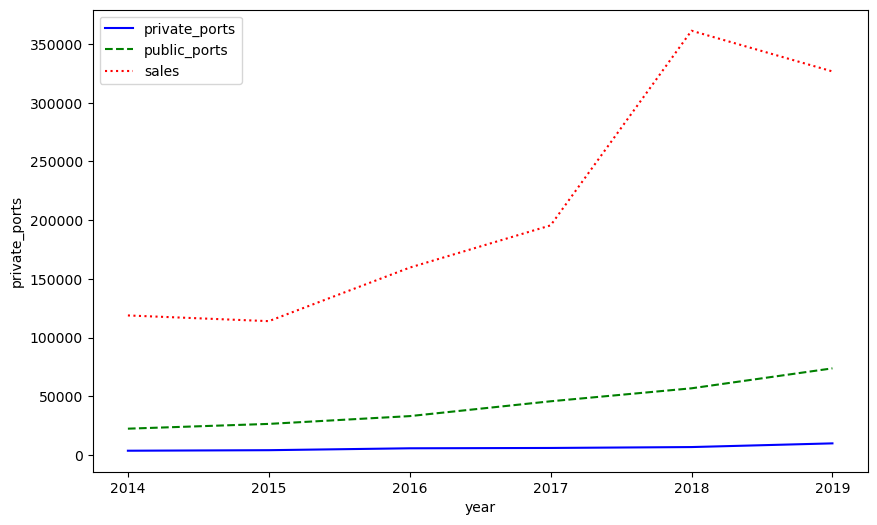

In [44]:
# Trends
sns.set_palette(palette=["blue", "green", "red"])
line_styles = ["-", "--", ":"]
fig, ax = plt.subplots(figsize=(10, 6))
for i, label in enumerate(["private_ports", "public_ports", "sales"]):
    sns.lineplot(data=all_data, x='year', y=label, ax=ax, label=label, linestyle=line_styles[i])
    
plt.show()
fig.savefig('ev_results.png')